### Image Segmentation Using K-Means Clustering for Color-Based Region Extraction

### Description: 

In this project, we will implement **K-Means clustering from scratch** and use it to perform image segmentation based on color similarity. **Image segmentation** is the process of dividing an image into meaningful regions. In this project, segmentation is done using **color clustering**, where every pixel is grouped into one of K color clusters.

### We are trying to minimize the objective function below:
$$J = \sum_{i=1}^{m} \sum_{k=1}^{K} w_{ik} ||x^{(i)} - \mu_k||^2$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
def load_image(path):
    img = Image.open(path)
    data = np.array(img)
    return data

def preprocess_image(image_data):
    pixels = image_data.reshape(-1, 3)
    return pixels

In [3]:
def initialize_centers(pixels, k):
    indices = np.random.choice(pixels.shape[0], k, replace=False)
    centers = pixels[indices]
    return centers

def assign_clusters(pixels, centers):
    distances = np.linalg.norm(pixels[:, np.newaxis] - centers, axis=2)    
    labels = np.argmin(distances, axis=1)
    return labels

def update_centers(pixels, labels, k):
    new_centers = []
    
    for i in range(k):
        cluster_pixels = pixels[labels == i]
        
        if len(cluster_pixels) > 0:
            mean_center = cluster_pixels.mean(axis=0)
            new_centers.append(mean_center)
        else:
            new_centers.append(pixels[np.random.choice(len(pixels))])
            
    return np.array(new_centers)

def kmeans(pixels, k, max_iters=10, tol=1e-4):
    centers = initialize_centers(pixels, k)
    
    for _ in range(max_iters):
        labels = assign_clusters(pixels, centers)
        
        new_centers = update_centers(pixels, labels, k)
        
        if np.linalg.norm(new_centers - centers) < tol:
            centers = new_centers
            break
            
        centers = new_centers
    return centers, labels

In [4]:
def recreate_image(labels, centers, image_shape):

    segmented_flat = centers[labels]
    
    segmented = segmented_flat.reshape(image_shape)
    
    segmented = segmented.astype(np.uint8)
    return segmented

In [5]:
def calculate_wcss(pixels, max_k=10):
    wcss = []  
    
    for k in range(1, max_k + 1):

        centers, labels = kmeans(pixels, k)
        

        assigned_centers = centers[labels]
        

        sq_diff = (pixels - assigned_centers) ** 2
        error = np.sum(sq_diff)
        
        wcss.append(error)
        print(f"K={k}: WCSS={error:.2f}")
    return wcss

def plot_elbow(wcss):
    k_range = range(1, len(wcss) + 1)
    
    plt.figure(figsize=(10, 6))
    plt.plot(k_range, wcss, marker='o', linestyle='--', color='b')
    
    plt.title('Elbow Method for Optimal K')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
    plt.xticks(k_range)
    plt.grid(True)
    
    plt.show()

K=1: WCSS=3235399381.58
K=2: WCSS=1054740223.62
K=3: WCSS=730881801.67
K=4: WCSS=500405410.37
K=5: WCSS=417020927.10
K=6: WCSS=374160061.28
K=7: WCSS=298135481.97
K=8: WCSS=255873238.38
K=9: WCSS=233576591.91
K=10: WCSS=221524960.14
Plotting the elbow curve...


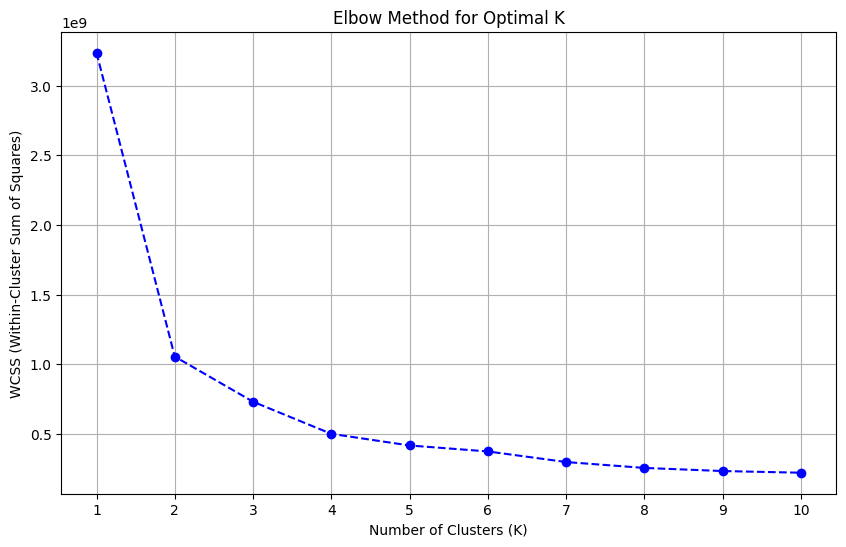

In [6]:
image_path_elbow = r"matryoshka.jpg"   
original_image_elbow = load_image(image_path_elbow)
pixel_data_elbow = preprocess_image(original_image_elbow)

wcss_values = calculate_wcss(pixel_data_elbow, max_k=10)

print("Plotting the elbow curve...")
plot_elbow(wcss_values)

In [7]:
image_path = r"matryoshka.jpg"  
k_value = 5 

print(f"Loading image from {image_path}...")
original_image = load_image(image_path)

pixel_data = preprocess_image(original_image)

print(f"Running K-Means with K={k_value}")
final_centers, final_labels = kmeans(pixel_data, k_value)

print("Reconstructing image...")
segmented_result = recreate_image(final_labels, final_centers, original_image.shape)

print("Segmentation complete!")

Loading image from matryoshka.jpg...
Running K-Means with K=5
Reconstructing image...
Segmentation complete!


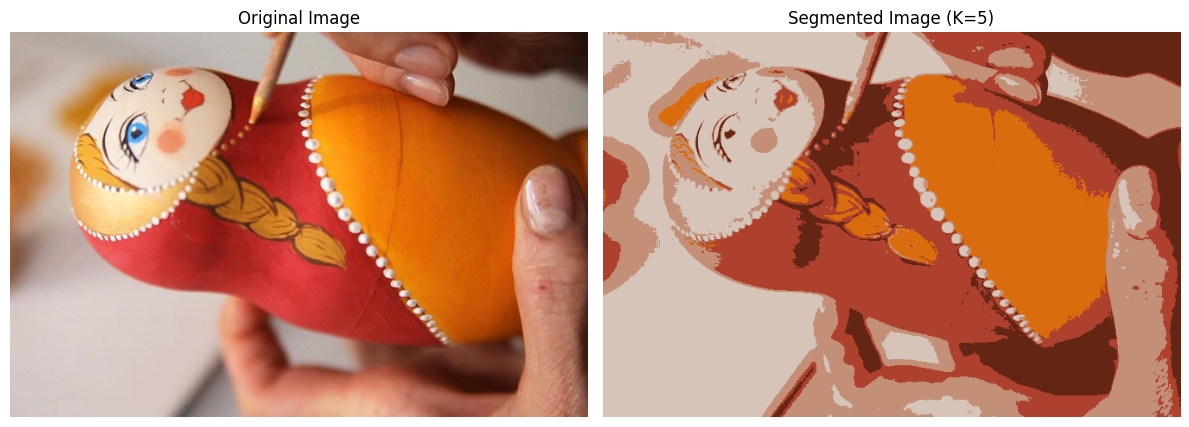

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(original_image)
ax[0].set_title('Original Image')
ax[0].axis('off')  # Hide axis ticks (they are irrelevant for images)

ax[1].imshow(segmented_result)
ax[1].set_title(f'Segmented Image (K={k_value})')
ax[1].axis('off')

plt.tight_layout()
plt.show()